In [1]:
from numba import jit
import numpy as np
import time

In [2]:
SAMPLES = 1_000_000 * 64
tempo_decorrido = []

In [3]:
def for_operation(nsamples):
    result = 0.00
    a = [x for x in range(nsamples)]
    b = [x for x in range(nsamples)]
    for i in range(nsamples):
        result += a[i] * b[i]
    return result

@jit(nopython=True)
def for_numba_operation(nsamples):
    result = 0.00
    a = [x for x in range(nsamples)]
    b = [x for x in range(nsamples)]
    for i in range(nsamples):
        result += a[i] * b[i]
    return result
    
def numpy_operation(nsamples):
    a = np.arange(nsamples).astype(np.float64)
    b = np.arange(nsamples).astype(np.float64)
    return np.sum(a * b)

# Pure Python

In [4]:
start_time = time.time()
print(str(for_operation(SAMPLES)))
tempo_decorrido.append(time.time() - start_time)
print("Tempo decorrido: {}".format(str(tempo_decorrido[-1])))

8.738133128538303e+22
Tempo decorrido: 13.377476930618286


# First Numba function call

In [5]:
start_time = time.time()
print(for_numba_operation(SAMPLES))
tempo_decorrido.append(time.time() - start_time)
print("Tempo decorrido: {}".format(str(tempo_decorrido[-1])))

8.738133128538303e+22
Tempo decorrido: 2.3002991676330566


# Numpy vetorized operation

In [6]:
start_time = time.time()
print(str(numpy_operation(SAMPLES)))
tempo_decorrido.append(time.time() - start_time)
print("Tempo decorrido: {}".format(str(tempo_decorrido[-1])))

8.738133128533233e+22
Tempo decorrido: 1.0772738456726074


# Plotagem

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

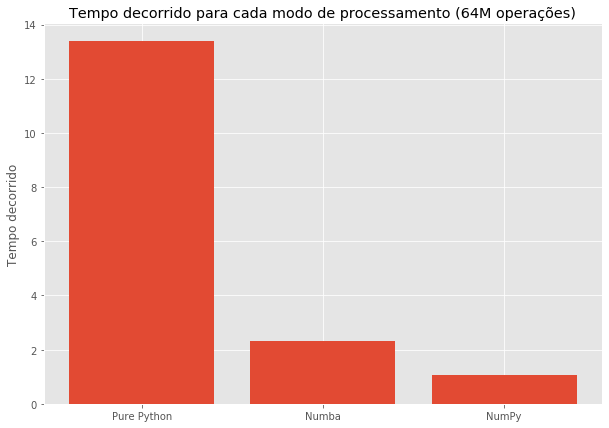

In [13]:
plt.figure(figsize=(10, 7))
plt.bar(np.arange(len(tempo_decorrido)), tempo_decorrido)
plt.title("Tempo decorrido para cada modo de processamento (64M operações)")
plt.xticks(np.arange(len(tempo_decorrido)), ('Pure Python', 'Numba', 'NumPy'))
plt.ylabel("Tempo decorrido")
plt.savefig("/Users/gabriel/Downloads/tempo_decorrido_numba.png")
plt.show()

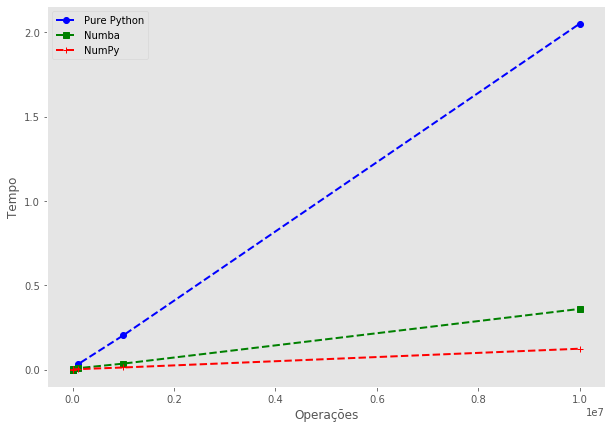

In [47]:
x = list([1, 10, 100, 10_000, 100_000, 1_000_000, 10_000_000])
plt.figure(figsize=(10, 7))
y1, y2, y3 = [], [], []
for sample in x:
    #pure python
    start_time = time.time()
    for_operation(sample)
    y1.append(time.time() - start_time)
    #numba
    start_time = time.time()
    for_numba_operation(sample)
    y2.append(time.time() - start_time)
    #numpy
    start_time = time.time()
    numpy_operation(sample)
    y3.append(time.time() - start_time)

plt.plot(x, y1, 'bo--', linewidth=2, label='Pure Python')
plt.plot(x, y2, 'gs--', linewidth=2, label='Numba')
plt.plot(x, y3, 'r+--', linewidth=2, label='NumPy')

plt.xlabel("Operaçōes")
plt.grid(False)
plt.ylabel("Tempo")
plt.legend()
plt.savefig("/Users/gabriel/Downloads/tempo_decorrido_numba_2.png")
plt.show()